### Homework 2 - PHYS247                                                                                       

Silvia Cabellos - 4/26/2020

#### Problem 1: Bayesian inference
In this problem, you are given a "tweet counts.csv" file which includes Bob's weekly activity on
twitter during the last year. The first and second columns are the number of week and weekly tweet
counts, respectively. The figure below, visualizes the data where the count of tweets per week is
shown as a function of week number. The horizontal red line shows the average number of weekly
tweets over the last year.


#### a) Read tweet counts.csv file and define two variables which represent the week number and weekly tweet counts.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
tweet=pd.read_csv(r'C:\Users\scabellos\OneDrive - Urban Science\User Documents\MastersDegree\AppliedDataScience\Homework2\tweet_counts.csv')

In [3]:
tweet=tweet.to_numpy() 
Ws=tweet[:, 0] # week number 
Ts=tweet[:, 1] # number of tweets in that week 

 #### What is the average number of weekly tweets over the last year? This is the horizontal line, I have plotted in the figure above.

In [4]:
print( "The average number of weekly tweets is : ",np.average(Ts))

The average number of weekly tweets is :  38.76923076923077


#### b) Use matplotlib.pyplot.bar to create the same figure shown above.

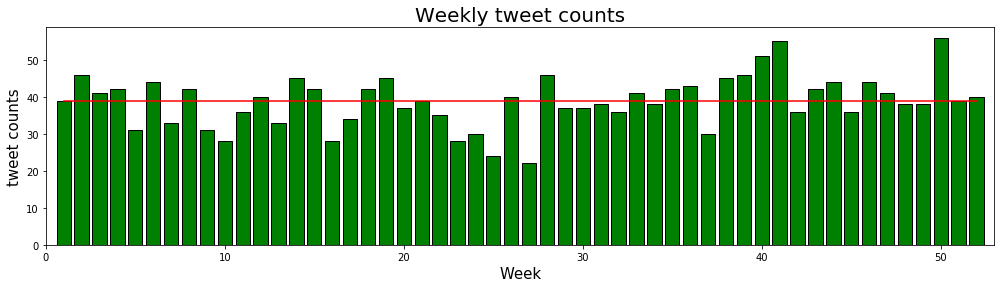

In [5]:
plt.figure(figsize=(17,4))
plt.plot(Ws, [np.average(Ts) for i in Ws],color='r')
plt.bar(Ws, Ts, color="green",edgecolor='black' )
            
    
plt.xlim(0,53)
plt.xlabel('Week',fontsize=15)
plt.ylabel('tweet counts',fontsize=15)
plt.title('Weekly tweet counts', fontsize=20)
plt.show()



#### c) Prove explicitly that the expected value is 1/ α  - 


This proof is submitted separately in a file 

#### d) Take the average value of λ from part "a" to estimate α . 


In [6]:
average_λ=np.average(Ts) 
α=1/average_λ
α # this is the prior 

0.025793650793650796

#### d) Take the average value of λ from part "a" to estimate α. Plot the estimated distribution function (P(λ) vs λ).

In [7]:
# first define the exponential distribution 

Exponential=lambda λ,α: α*np.exp(-λ*α)
Exponential=np.vectorize(Exponential)

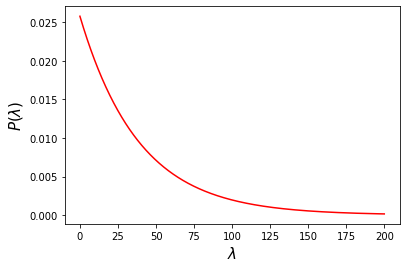

In [8]:
plt.plot(np.linspace(0,200,1000),Exponential(np.linspace(0,200,1000),α),c='r')
plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('$P(λ)$', fontsize=15)
plt.show()

#### e) Use numpy.linspace to create two variables with 1x50 array in the interval of 25 and 50. These variables are defined as the model space that we want to search for posterior of $\lambda1$ and $\lambda2\$. You have also defined an array in part a) which shows the week number. This provides a space for WS. Consider all these points as a 3-D mesh-grid, how can we find posterior for each point in the 3-D space given all the information you have? Use Bayes' theorem to elaborate your method in detail.

 First we need to define what's our hypothesis and what is our data. And create a model to calculate our posterior using the Bayes Theorem 

P(H|D) = P(D|H)*P(H) / P(D) or         P(H|D) $\propto$  P(D|H)P(H) ( unnormalized ) 

H= Tweeter Pattern Week_s
D= Count of tweets Week_s 








$\begin{equation} 
P(Tweeter Pattern changes Week_s |Count of tweets per Week)--> 
\end{equation}$
Posterior probability


$\begin{equation*} 
P(Count of tweets per Week|Tweeter Pattern) = Likelihood function --> 
\end{equation*}$
It follows a Poisson Distribution 

$\begin{equation*} 
P(Tweeter Pattern)  = Prior probability --> 
\end{equation*}$
It follows Exponential  Distribution 




In [9]:
λ1=np.linspace(25,50,50) # variable space to look for \lambda1 
λ2=np.linspace(25,50,50) # variable space to look for \lambda2
Ws=np.arange(1,53,1) # defined at the begining on the homework , space for the weeks. 

In [10]:
# model space for λ1,λ1,Ws

grid3D=np.vstack(np.meshgrid(λ1,λ2,Ws)).reshape(3,-1).T

In [11]:
grid3D[1:5]

array([[25., 25.,  2.],
       [25., 25.,  3.],
       [25., 25.,  4.],
       [25., 25.,  5.]])

In [12]:
len(grid3D)
#len points is 50x50x52=130000 which correspond with all the parameters combined. 

130000

Now, we are going to define the Posterior which proportional to the product of the likelihood function and the priors . In our case, the likelihood function follows the Poisson and the priors we are taking follow the Exponential distribution. 

The Posterior model follows a conditional distribution, determined by the value of the week. 



In [13]:
Poisson=lambda k,λ: (λ**k)*np.exp(-λ)/np.math.factorial(k)
Poisson=np.vectorize(Poisson)

In [14]:
def Posterior_Final(λ1,λ2,Ws):
    
    P=1
    for w,t in tweet:
        if w<Ws:
            P=P*Poisson(t,λ1)*Exponential(λ1,α)
        if w>=Ws:
            P=P*Poisson(t,λ2)*Exponential(λ2,α)
    return(P)

In [15]:
Posterior_Final=np.vectorize(Posterior_Final)

After this, we need to normalize the probabilities using np.trapz but for 2 variables this time. Posterior=P_/np.trapz(P_,λ_est)

In [16]:
pf=[]
for i,j,h in grid3D:
    d_=Posterior_Final(i,j,h) 
    pf.append([d_,i,j,h])  

In [17]:
print(len(pf))

130000


In [18]:
p=[]
l1=[]
l2=[]
week=[]
for i in range(0,len(pf)):
    p.append(pf[i][0])
    l1.append(pf[i][1])
    l2.append(pf[i][2]) 
    week.append(pf[i][3])

In [19]:
post_n1=p/np.trapz(p,l1)
len(post_n1)

130000

In [20]:
post_n2=post_n1/np.trapz(post_n1,l2)
len(post_n2)

130000

In [21]:
post_n3=post_n2/np.trapz(post_n2,week)
len(post_n3)

130000

In [22]:
sum(post_n3)

1.1616572547817874

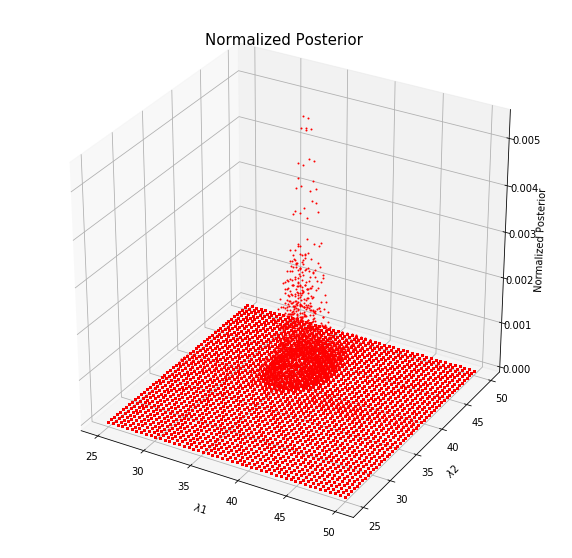

In [23]:
from mpl_toolkits import mplot3d 
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
#ax.plot3D(l1,l2,p,'r', linestyle='none', marker='o',markersize=2)
ax.plot3D(l1,l2,post_n3,'r', linestyle='none', marker='o',markersize=1)


ax.set_xlabel('$\lambda1$', fontsize=10)
ax.set_ylabel('$\lambda2$', fontsize=10)
ax.set_zlabel('Normalized Posterior', fontsize=10);
#plt.axis('equal')

plt.title("Normalized Posterior ",fontsize=15);

#### f) Write a code to find marginalized-posterior for $\lambda1$, $\lambda2$ and WS. Plot posteriors for $\lambda1$ and $\lambda2$ in the same figure and create a bar plot for posterior of WS in a separate figure. Running your code for this part may take a long time since you compute posterior for every single point in your model space. However, we will learn more efficient way, Markov chain Monte Carlo (MCMC), later in the next homework.

In [24]:

Marg2D_λ1=[]
for i in range(0,len(post_n3)-1):
    x0=[post_n3[i],post_n3[i+1]]
    x1=[l2[i],l2[i+1]]
    Marg2D_λ1.append(np.trapz(x0,np.flip(x1)))
    

Marg1D_λ1=[]
for i in range(0,len(Marg2D_λ1)-1):
    x0=[Marg2D_λ1[i],Marg2D_λ1[i+1]]
    x1=[week[i],week[i+1]]
    Marg1D_λ1.append(np.trapz(x0,x1))



In [72]:
for x in week:
    for i in range(len(l1)):
        print((np.sum(pf[0][i]),pf[1][i],pf[2][i]))
print(np.sum(x, axis=0))

(6.508106499741394e-247, array(6.5081065e-247), array(6.5081065e-247))
(25.0, 25.0, 25.0)
(25.0, 25.0, 25.0)
(1.0, 2.0, 3.0)


IndexError: list index out of range

In [79]:
pf_numpy = np.array(pf)
pf_dataframe = pd.DataFrame(data=pf_numpy, columns=["prob", "l1","l2","week",])

In [80]:
pf_dataframe

,prob,l1,l2,week
0,6.508106e-247,25.0,25.0,1.0
1,6.508106e-247,25.0,25.0,2.0
2,6.508106e-247,25.0,25.0,3.0
3,6.508106e-247,25.0,25.0,4.0
4,6.508106e-247,25.0,25.0,5.0
...,...,...,...,...
129995,3.503057e-219,50.0,50.0,48.0
129996,3.503057e-219,50.0,50.0,49.0
129997,3.503057e-219,50.0,50.0,50.0
129998,3.503057e-219,50.0,50.0,51.0


In [ ]:

display('df', "df.groupby(df['key']).sum()")

In [100]:
pf_dataframe_=pf_dataframe.groupby(pf_dataframe['week']).sum()
pf_dataframe_.head()

,prob,l1,l2
week,,,
1.0,3.827420e-179,93750.0,93750.0
2.0,2.210665e-179,93750.0,93750.0
3.0,2.379183e-179,93750.0,93750.0
4.0,2.120630e-179,93750.0,93750.0
5.0,2.170461e-179,93750.0,93750.0


In [101]:

df2 = pf_dataframe.set_index('prob')
mapping = {'week': 'week', 'l1': 'l1'}
pf_dataframe_=df2.groupby(mapping).sum()
pf_dataframe_

,l1,l2,week


In [32]:
numpy_data = np.array([[1, 2], [3, 4]])
df = pd.DataFrame(data=numpy_data, index=["row1", "row2"], columns=["column1", "column2"])

150.0

In [51]:
x=np.unique(Marg2D_λ1_final)
len(x)

122601

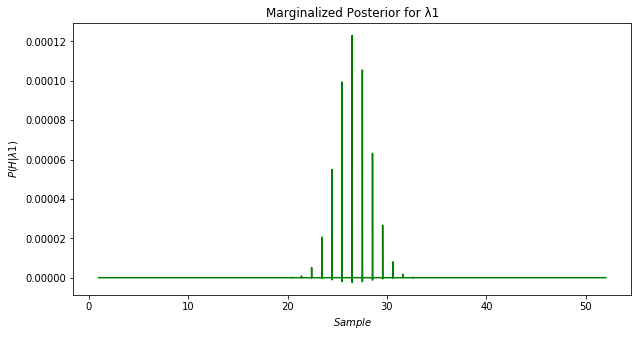

In [25]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10,5))
plt.plot(np.linspace(1,52,129998),Marg1D_λ1[0:129998],c='g')

plt.xlabel('$Sample$', fontsize=10)
plt.ylabel('$P(H|λ1)$', fontsize=10)
plt.title('Marginalized Posterior for λ1')
plt.show()

In [26]:


Marg2D_λ2=[]
for i in range(0,len(post_n3)-1):
    x0=[post_n3[i],post_n3[i+1]]
    x1=[l1[i],l1[i+1]]
    Marg2D_λ2.append(np.trapz(x0,x1))
    

Marg1D_λ2=[]
for i in range(0,len(Marg2D_λ2)-1):
    x0=[Marg2D_λ2[i],Marg2D_λ2[i+1]]
    x1=[week[i],week[i+1]]
    Marg1D_λ2.append(np.trapz(x0,x1))


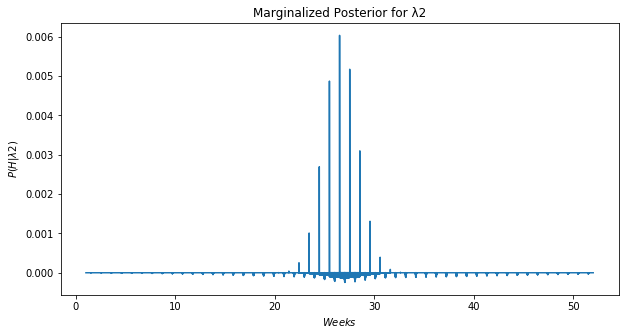

In [27]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10,5))
plt.plot(np.linspace(1,52,129998),Marg1D_λ2)

plt.xlabel('$Weeks$', fontsize=10)
plt.ylabel('$P(H|λ2)$', fontsize=10)
plt.title('Marginalized Posterior for λ2')

plt.show()

In [28]:

Marg2D_W=[]
for i in range(0,len(post_n3)-1):
    x0=[post_n3[i],post_n3[i+1]]
    x1=[l1[i],l1[i+1]]
    Marg2D_W.append(np.trapz(x0,x1))
    

Marg1D_W=[]
for i in range(0,len(Marg2D_W)-1):
    x0=[Marg2D_W[i],Marg2D_W[i+1]]
    x1=[l2[i],l2[i+1]]
    Marg1D_W.append(np.trapz(x0,np.flip(x1)))


In [29]:
len(Marg1D_W),len(week)

(129998, 130000)

In [30]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10,5))
plt.bar(np.linspace(1,52,129998),Marg1D_W)

plt.xlabel('$Weeks$', fontsize=10)
plt.ylabel('$P(H|Ws)$', fontsize=10)
plt.title('Marginalized Posterior for Ws')
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000020391CFECA8> (for post_execute):


KeyboardInterrupt: 

#### g) How is your belief updated about a sudden change in Bob's tweeting habit? Can you estimate the week when tweeting pattern changed? Use marginalized 2-D posteriors of λ1 and λ2 to obtain P(λ2 - λ1 > 5). This shows the probability that Bob's weekly tweet counts has increased by five at some point.

In [ ]:
Marg2D=[]
for i in range(0,len(post_n3)-1):
    x0=[post_n3[i],post_n3[i+1]]
    x1=[week[i],week[i+1]]
    Marg2D.append(np.trapz(x0,x1))

In [ ]:
# normalize 

Marg2D_N=Marg2D[0:129999]/np.trapz(Marg2D[0:129999],week[0:129999]) 

In [ ]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10,5))
plt.scatter(week[0:129999],Marg2D_N,c='b')
plt.vlines(λ_mode,0,0.001,color='red')
plt.ylim(0,0.001)
plt.xlim(20,53)
plt.xlabel('$Weeks$', fontsize=10)
plt.ylabel('$Marginalized Posterior for λ1,λ2$', fontsize=10)
#plt.text(λ_mode,np.max(Posterior),'λ(mode)={:0.2f}'.format(λ_mode),fontsize=20)
plt.text(λ_mode+0.25,np.max(Marg2D_N)+0.0001,'λ(mode)={:0.2f}'.format(λ_mode), fontsize=10) 
plt.title('Marginalized Posterior for λ1,λ2')
plt.show()

In [ ]:
μ=np.trapz(week[0:129999]*Marg2D_N[0:129999],week[0:129999])
μ

In [ ]:
σ=np.sqrt(np.trapz(((week[0:129999]-μ)**2)*Marg2D_N[0:129999],week[0:129999]))
σ

In [ ]:
λ_mode=week[0:129999][np.argmax(Marg2D_N[0:129999])]
λ_mode

In [ ]:
Probability=[]
for i in range(len(grid3D)):
    if (grid3D[i][1]-grid3D[i][0])>5:
        Probability.append(1)
        

In [ ]:
print("Probability of Bob's weekly tweet count to increase by 5 is =",len(Probability)/len(grid3D)*100)